In [ ]:
%matplotlib inline


# Normalized Cut

This example constructs a Region Adjacency Graph (RAG) and recursively performs
a Normalized Cut on it [1]_.

## References
.. [1] Shi, J.; Malik, J., "Normalized cuts and image segmentation",
       Pattern Analysis and Machine Intelligence,
       IEEE Transactions on, vol. 22, no. 8, pp. 888-905, August 2000.


In [ ]:
!pip3 install scikit-image

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from matplotlib import pyplot as plt
from skimage import io
from skimage import data, segmentation, color
from skimage.future import graph
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.color import rgb2lab

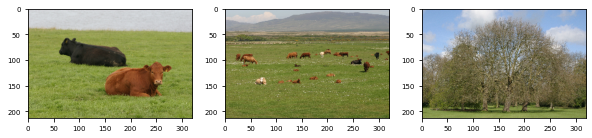

In [60]:
#load images
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.util import img_as_ubyte
from skimage.measure import label
import numpy as np
chosen_imgs=["/content/drive/MyDrive/2021/ISPR/msrc_objcategimagedatabase_v1/1_20_s.bmp",
             "/content/drive/MyDrive/2021/ISPR/msrc_objcategimagedatabase_v1/1_10_s.bmp",
             "/content/drive/MyDrive/2021/ISPR/msrc_objcategimagedatabase_v1/2_3_s.bmp"]
imgs=[]
reimgs=[]
for img in chosen_imgs:
  imgs.append(io.imread(img))
# resize images
for img in imgs:
  temp = resize(img, (img.shape[0]//2.5, img.shape[1]//2.5))
  temp = img_as_ubyte(temp)
  reimgs.append(temp)
fig, ax = plt.subplots(ncols=3, figsize=(10, 10))
plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)
ax[0].imshow(imgs[0])
ax[1].imshow(imgs[1])
ax[2].imshow(imgs[2])

In [62]:
#label each pixel in the image as an individual region
import numpy as np
def labelpixel(img):
  width = img.shape[0]
  height = img.shape[1]
  labels = np.zeros((width,height))
  for i in range(width):
    for j in range(height):
      labels[i][j] = i*height+j
  return labels.astype(int)

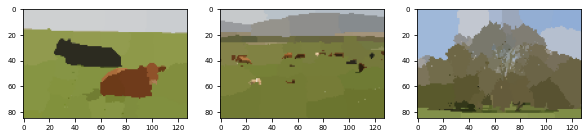

In [70]:
#Perform Ncut
ncut_res = []
ncut_lbs = []
for img in reimgs:
  label = labelpixel(img)
  g = graph.rag_mean_color(img, label, mode='similarity')
  ncut_label = graph.cut_normalized(label, g, thresh=0.03)
  ncut_out = color.label2rgb(ncut_label, img, kind='avg')
  ncut_res.append(ncut_out)
  ncut_lbs.append(ncut_label)

fig, ax = plt.subplots(ncols=len(reimgs), figsize=(10, 10))
plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)
for i in range(len(reimgs)):
  #ax[i].imshow(mark_boundaries(ncut_res[i], ncut_lbs[i], mode='subpixel'))
  ax[i].imshow(ncut_res[i])


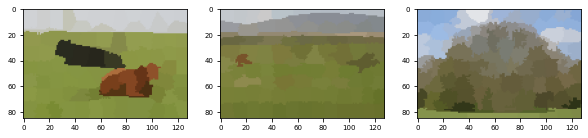

In [84]:
#perform Kmeans
slic_res = []
slic_lbs = []
for img in reimgs:
  slic_label = slic(img, n_segments=100, compactness=10)
  slic_out = color.label2rgb(slic_label, img, kind='avg')
  slic_res.append(slic_out)
  slic_lbs.append(slic_label)
  # plot the result of slic
fig, ax = plt.subplots(ncols=len(reimgs), figsize=(10, 10))
plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)
for i in range(len(reimgs)):
  #ax[i].imshow(mark_boundaries(slic_res[i], slic_lbs[i], mode='subpixel'))
  ax[i].imshow(slic_res[i])


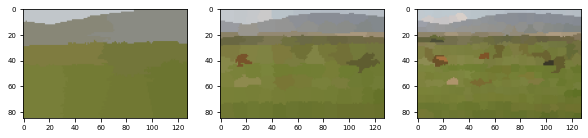

In [102]:
#perform K means with different Ks
slick_res = []
slick_lbs = []
chosen_k = [10,100,300]
k_img = reimgs[1]
for k in chosen_k:
  slic_label = slic(k_img, n_segments=k, compactness=10)
  slic_out = color.label2rgb(slic_label, k_img, kind='avg')
  slick_res.append(slic_out)
  slick_lbs.append(slic_label)
  # plot the result of slic
fig, ax = plt.subplots(ncols = len(reimgs), figsize=(10, 10))
plt.rc('xtick',labelsize = 7)
plt.rc('ytick',labelsize = 7)
for i in range(len(reimgs)):
  #ax[i].imshow(mark_boundaries(slick_res[i], slic_lbs[i], mode='subpixel'))
  ax[i].imshow(slick_res[i])

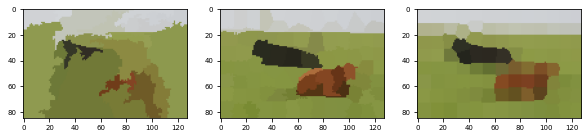

In [103]:
#perform K means with different compactness value
slicc_res = []
slicc_lbs = []
chosen_c=[0.01,10,100]
c_img=reimgs[0]
for c in chosen_c:
  slic_label = slic(c_img, n_segments=100, compactness=c)
  slic_out = color.label2rgb(slic_label, c_img, kind='avg')
  slicc_res.append(slic_out)
  slicc_lbs.append(slic_label)
  # plot the result of slic
fig, ax = plt.subplots(ncols=len(reimgs), figsize=(10, 10))
plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)
for i in range(len(reimgs)):
  #ax[i].imshow(mark_boundaries(slicc_res[i], slic_lbs[i], mode='subpixel'))
  ax[i].imshow(slicc_res[i])

Text(0.5, 1.0, 'NCut')

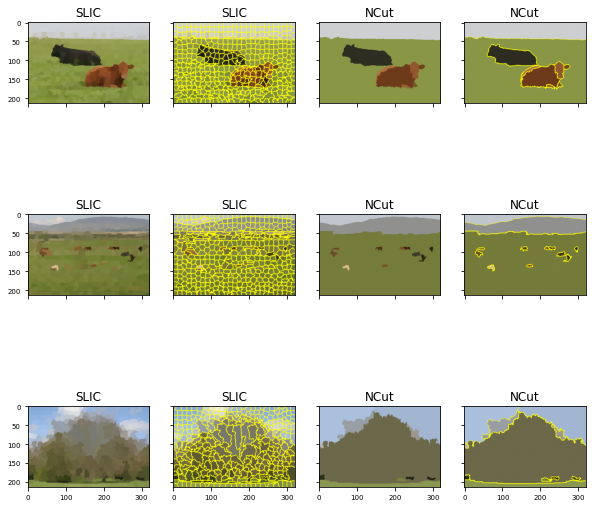

In [121]:
#Kmeans+Ncut
slic_lab = []
slic_out = []
ncut_lab = []
ncut_out = []
for img in imgs:
  sliclabel = slic(img, n_segments=500, compactness=10)
  slicout = color.label2rgb(sliclabel, img, kind='avg')
  g = graph.rag_mean_color(img, sliclabel, mode='similarity')
  ncutlabel = graph.cut_normalized(sliclabel, g)
  ncutout = color.label2rgb(ncutlabel, img, kind='avg')
  slic_lab.append(sliclabel)
  slic_out.append(slicout)
  ncut_lab.append(ncutlabel)
  ncut_out.append(ncutout)

fig, ax = plt.subplots(len(imgs), 4, figsize=(10, 10), sharex=True, sharey=True)
ax[0, 0].imshow(slic_out[0])
ax[0, 0].set_title("SLIC")
ax[0, 1].imshow(mark_boundaries(slic_out[0], slic_lab[0]))
ax[0, 1].set_title("SLIC")
ax[0, 2].imshow(ncut_out[0])
ax[0, 2].set_title("NCut")
ax[0, 3].imshow(mark_boundaries(ncut_out[0], ncut_lab[0]))
ax[0, 3].set_title("NCut")
ax[1, 0].imshow(slic_out[1])
ax[1, 0].set_title("SLIC")
ax[1, 1].imshow(mark_boundaries(slic_out[1], slic_lab[1]))
ax[1, 1].set_title("SLIC")
ax[1, 2].imshow(ncut_out[1])
ax[1, 2].set_title("NCut")
ax[1, 3].imshow(mark_boundaries(ncut_out[1], ncut_lab[1]))
ax[1, 3].set_title("NCut")
ax[2, 0].imshow(slic_out[2])
ax[2, 0].set_title("SLIC")
ax[2, 1].imshow(mark_boundaries(slic_out[2], slic_lab[2]))
ax[2, 1].set_title("SLIC")
ax[2, 2].imshow(ncut_out[2])
ax[2, 2].set_title("NCut")
ax[2, 3].imshow(mark_boundaries(ncut_out[2], ncut_lab[2]))
ax[2, 3].set_title("NCut")



In [114]:
slic_lab = []
slic_out = []
ncut_lab = []
ncut_out = []
for img in imgs:
  sliclabel = slic(img, n_segments=50, compactness=10)
  slicout = color.label2rgb(sliclabel, img, kind='avg')
  g = graph.rag_mean_color(img, sliclabel, mode='similarity')
  ncutlabel = graph.cut_normalized(sliclabel, g, thresh=0.03)
  ncutout = color.label2rgb(ncutlabel, img, kind='avg')
  slic_lab.append(sliclabel)
  slic_out.append(slicout)
  ncut_lab.append(ncutlabel)
  ncut_out.append(ncutout)

slic_lab1 = slic(imgs[0], n_segments=50, compactness=10)
slic_out1 = color.label2rgb(slic_lab1, imgs[0], kind='avg')
g = graph.rag_mean_color(imgs[0], slic_lab1, mode='similarity')
ncut_lab1 = graph.cut_normalized(slic_labl, g, thresh=0.03)
ncut_out1 = color.label2rgb(ncut_labl, imgs[0], kind='avg')

slic_lab2 = slic(img[1], n_segments=50, compactness=10)
slic_out2 = color.label2rgb(slic_lab2, imgs[1], kind='avg')
g = graph.rag_mean_color(imgs[1], slic_lab2, mode='similarity')
ncut_lab2 = graph.cut_normalized(slic_lab2, g, thresh=0.03)
ncut_out2 = color.label2rgb(ncut_lab2, imgs[1], kind='avg')

slic_lab3 = slic(img[3], n_segments=50, compactness=10)
slic_out3 = color.label2rgb(slic_lab3, imgs[2], kind='avg')
g = graph.rag_mean_color(img[2], slic_lab3, mode='similarity')
ncut_lab3 = graph.cut_normalized(slic_lab3, g, thresh=0.03)
ncut_out3 = color.label2rgb(ncut_lab3, imgs[2], kind='avg')

(85, 128, 3)